In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## DATA READING 

In [2]:
#Reading the dataset

data = pd.read_csv('data/movie_metadata.csv')
data.shape

(5043, 28)

## DATA EXPLORATION 

|Column Name | Description|
| :---   | :---  |
|movie_title|Title of the Movie|
|duration|Duration in minutes|
|director_name|Name of the Director of the Movie|
|director_facebook_likes|Number of likes of the Director on his Facebook Page|
|actor_1_name|Primary actor starring in the movie|
|actor_1_facebook_likes	|Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name|Other actor starring in the movie|
|actor_2_facebook_likes	|Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name|Other actor starring in the movie|
|actor_3_facebook_likes|Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews|Number of users who gave a review|
|num_critic_for_reviews|Number of critical reviews on imdb|
|num_voted_users|Number of people who voted for the movie|
|cast_total_facebook_likes|Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes|Number of Facebook likes in the movie page|
|plot_keywords|	Keywords describing the movie plot|
|facenumber_in_poster|Number of the actor who featured in the movie poster|
|color|Film colorization. ‘Black and White’ or ‘Color’|
|genres|Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year|The year in which the movie is released (1916-2016)|
|language|English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country|Country where the movie is produced|
|content_rating|Content rating of the movie|
|aspect_ratio|Aspect ratio the movie was made in|
|movie_imdb_link|IMDB link of the movie|
|gross|Gross earnings of the movie in Dollars|
|budget|Budget of the movie in Dollars|
|imdb_score|IMDB Score of the movie on IMDB|

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Text(0.5, 1.0, '')

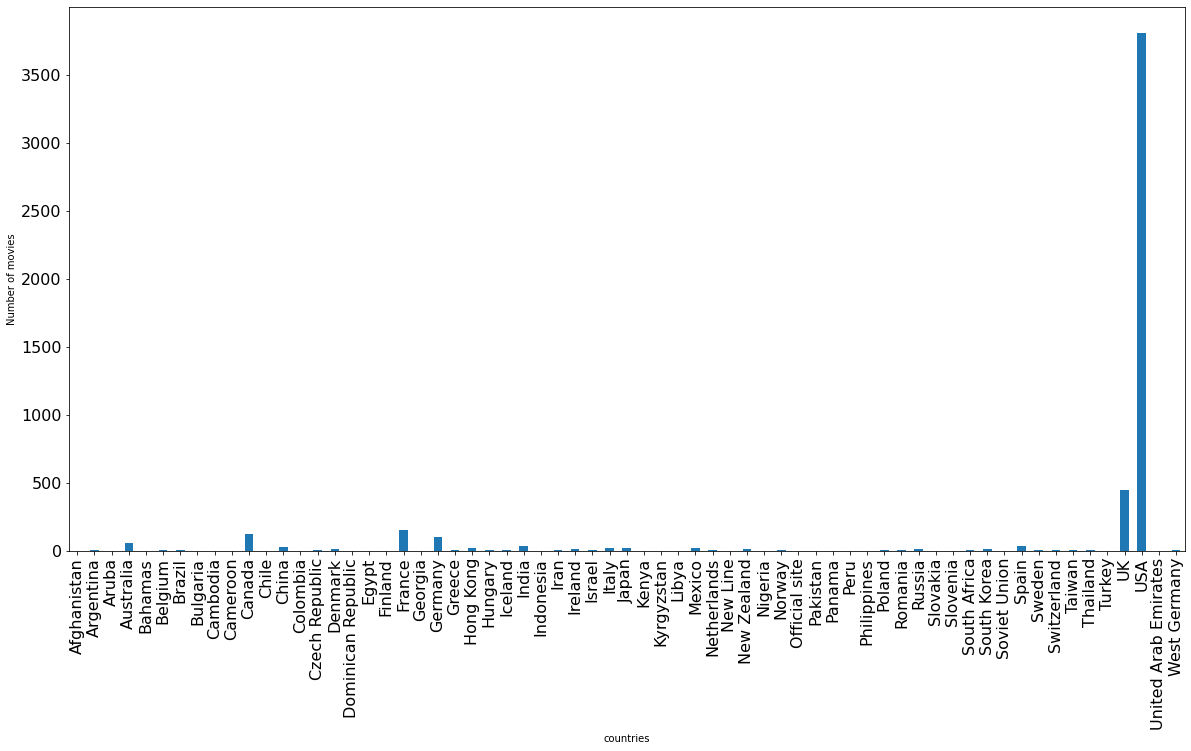

In [8]:
#Barplot of country column
plt.figure(figsize = (20,10))
data.groupby(['country']).size().plot(kind="bar",fontsize=16)
plt.xlabel('countries')
plt.ylabel('Number of movies')
plt.title('')

Text(0.5, 1.0, '')

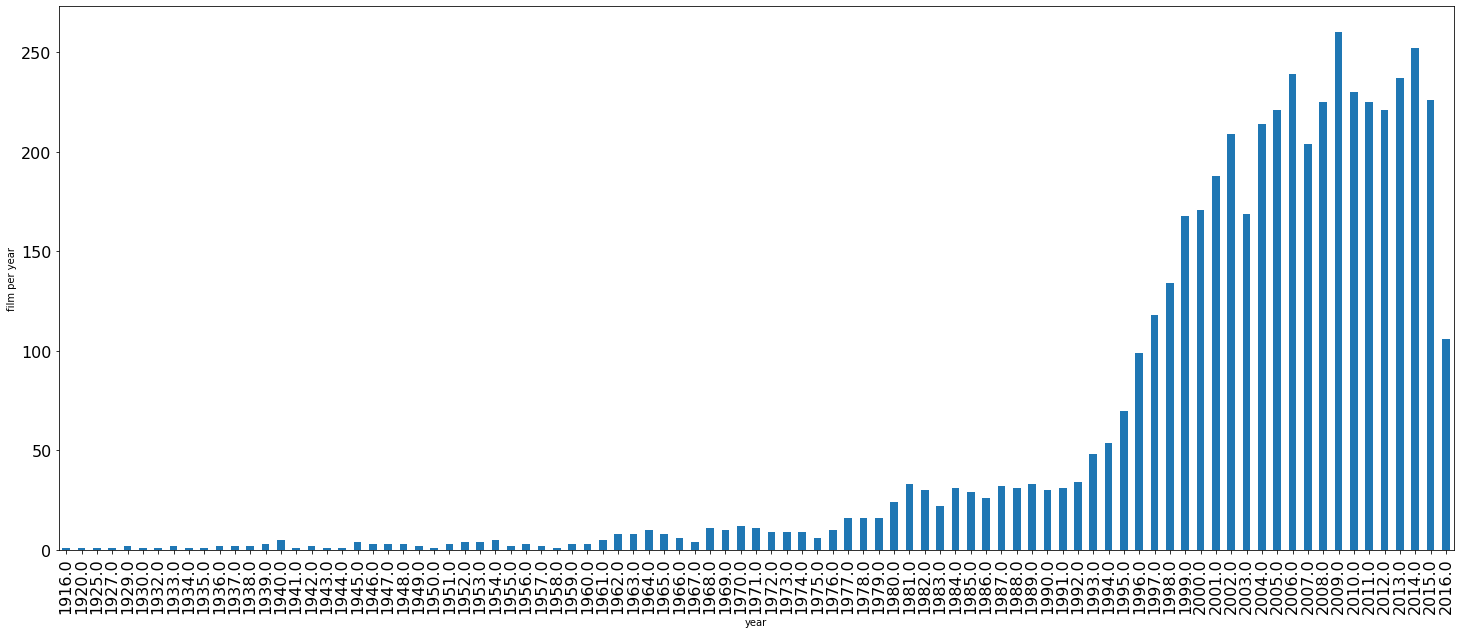

In [12]:
#Barplot of title year column
plt.figure(figsize = (25,10))
data.groupby(['title_year']).size().plot(kind="bar", fontsize=16)
plt.xlabel('year')
plt.ylabel('film per year')
plt.title('')

Text(0.5, 1.0, 'imdb score distribution')

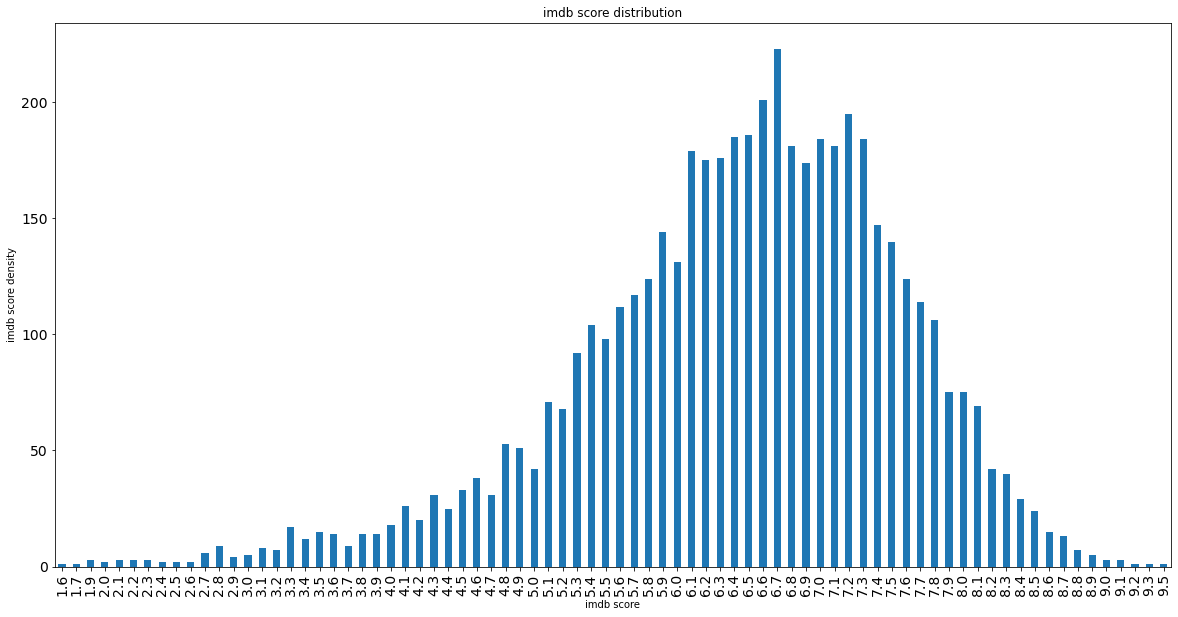

In [13]:
# Barplot of imbd_binned column
plt.figure(figsize = (20,10))
data.groupby(['imdb_score']).size().plot(kind="bar",fontsize=14)
plt.xlabel('imdb score')
plt.ylabel('imdb score density')
plt.title('imdb score distribution')

## DATA PREPROCESSING

### Target variable 

In [14]:
#Categorising the target varible 

bins = [ 1, 5, 7, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_binned'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,HIT
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,HIT
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,AVG
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,AVG


In [15]:
# Removing the column "imdb_score" since we have "imdb_binned"

data.drop(columns=['imdb_score'],inplace=True)

Text(0.5, 1.0, 'Categorization of Movies')

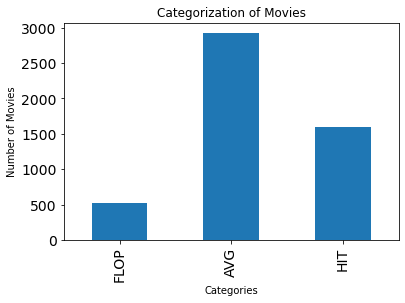

In [16]:
#Barplot of imbd_binned column

data.groupby(['imdb_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [17]:
data.shape

(5043, 28)

In [18]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,16.000000,349000.000000


## Handling the Missing values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      5024 non-null   object  
 1   director_name              4939 non-null   object  
 2   num_critic_for_reviews     4993 non-null   float64 
 3   duration                   5028 non-null   float64 
 4   director_facebook_likes    4939 non-null   float64 
 5   actor_3_facebook_likes     5020 non-null   float64 
 6   actor_2_name               5030 non-null   object  
 7   actor_1_facebook_likes     5036 non-null   float64 
 8   gross                      4159 non-null   float64 
 9   genres                     5043 non-null   object  
 10  actor_1_name               5036 non-null   object  
 11  movie_title                5043 non-null   object  
 12  num_voted_users            5043 non-null   int64   
 13  cast_total_facebook_likes  5043 n

In [20]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
aspect_ratio                 329
movie_facebook_likes           0
imdb_binned                    0
dtype: int64

In [21]:
#Droping the samples that have missing values
data.dropna(inplace=True)

#Final shape of the data after Droping missing values
data.shape

(3756, 28)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      3756 non-null   object  
 1   director_name              3756 non-null   object  
 2   num_critic_for_reviews     3756 non-null   float64 
 3   duration                   3756 non-null   float64 
 4   director_facebook_likes    3756 non-null   float64 
 5   actor_3_facebook_likes     3756 non-null   float64 
 6   actor_2_name               3756 non-null   object  
 7   actor_1_facebook_likes     3756 non-null   float64 
 8   gross                      3756 non-null   float64 
 9   genres                     3756 non-null   object  
 10  actor_1_name               3756 non-null   object  
 11  movie_title                3756 non-null   object  
 12  num_voted_users            3756 non-null   int64   
 13  cast_total_facebook_likes  3756 n

## Duplicate values

In [23]:
duplicates = data[data.duplicated()] 
display(duplicates)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_binned
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,2.35,29000,AVG
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,2.35,65000,AVG
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,2.35,24000,AVG
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,2.35,41000,FLOP
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,2.35,14000,AVG
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,2.35,21000,AVG
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,1.85,0,HIT
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,1.85,123000,HIT
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,2.35,35000,HIT
1305,Color,Paul McGuigan,159.0,110.0,118.0,287.0,Spencer Wilding,11000.0,5773519.0,Drama|Horror|Sci-Fi|Thriller,...,91.0,English,USA,PG-13,40000000.0,2015.0,1000.0,2.35,11000,AVG


In [24]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(3723, 28)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      3723 non-null   object  
 1   director_name              3723 non-null   object  
 2   num_critic_for_reviews     3723 non-null   float64 
 3   duration                   3723 non-null   float64 
 4   director_facebook_likes    3723 non-null   float64 
 5   actor_3_facebook_likes     3723 non-null   float64 
 6   actor_2_name               3723 non-null   object  
 7   actor_1_facebook_likes     3723 non-null   float64 
 8   gross                      3723 non-null   float64 
 9   genres                     3723 non-null   object  
 10  actor_1_name               3723 non-null   object  
 11  movie_title                3723 non-null   object  
 12  num_voted_users            3723 non-null   int64   
 13  cast_total_facebook_likes  3723 n

## Categorical data

In [26]:
# Describing the categorical data
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3723,3723,3723,3723,3723,3723,3723,3723,3723,3723,3723,3723
unique,2,1659,2188,745,1428,3655,2587,3656,3656,34,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,King Kong,Steve Coogan,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,3600,25,20,147,42,3,8,3,3,3566,2961,1687


In [27]:
#'movie_title','movie_imdb_link' columns are almost unique,so they doesn't contribute in predicting target variable
data.drop(columns = ['movie_title','movie_imdb_link'],inplace=True)

## Label Encoding


In [28]:
# ONE HOT ENCODING 
'''def onehot(data, variable, prefix):
    oneh = pd.get_dummies(data[variable], prefix=prefix)
    data = data[[x for x in data.columns if x != variable]]
    data = data.join(oneh)
    return data

# categorical columns 
cat_list=['color', 'director_name', 'actor_2_name',
          'genres', 'actor_1_name','actor_3_name',
          'plot_keywords','language', 'country', 
          'content_rating','title_year', 'aspect_ratio']

for i in range(len(cat_list)) :
    data = onehot(data, cat_list[i], cat_list[i])
'''

"def onehot(data, variable, prefix):\n    oneh = pd.get_dummies(data[variable], prefix=prefix)\n    data = data[[x for x in data.columns if x != variable]]\n    data = data.join(oneh)\n    return data\n\n# categorical columns \ncat_list=['color', 'director_name', 'actor_2_name',\n          'genres', 'actor_1_name','actor_3_name',\n          'plot_keywords','language', 'country', \n          'content_rating','title_year', 'aspect_ratio']\n\nfor i in range(len(cat_list)) :\n    data = onehot(data, cat_list[i], cat_list[i])\n"

In [29]:
pd.set_option('display.max_columns', None)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,2.35,164000,HIT
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,2.35,24000,AVG


In [30]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,2.35,164000,HIT
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,2.35,24000,AVG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,39.0,French,France,R,4500.0,2004.0,133.0,2.35,171,AVG
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,1.85,697,HIT
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,1.85,19000,AVG
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,130.0,Spanish,USA,R,7000.0,1992.0,20.0,1.37,0,AVG


In [31]:
#Label encoding the categorical columns

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# categorical columns 
cat_list=['color', 'director_name', 'actor_2_name',
          'genres', 'actor_1_name','actor_3_name',
          'plot_keywords','language', 'country', 
          'content_rating','title_year', 'aspect_ratio']


# apply fit_transform 
data[cat_list]= data[cat_list].apply(lambda x:encoder.fit_transform(x))

In [32]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,91,189,886204,4834,2529,0.0,1038,3054.0,9,43,7,237000000.0,66,936.0,7,33000,HIT
1,1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,85,687,471220,48350,1001,0.0,3327,1238.0,9,43,7,300000000.0,64,5000.0,12,0,HIT
2,1,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,107,258,275868,11700,2296,1.0,1625,994.0,9,42,7,245000000.0,72,393.0,12,85000,AVG
3,1,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,243,1340,1144337,106759,1267,0.0,2736,2701.0,9,43,7,250000000.0,69,23000.0,12,164000,HIT
5,1,62,462.0,132.0,475.0,530.0,1837,640.0,73058679.0,105,323,212204,1873,1967,1.0,507,738.0,9,43,7,263700000.0,69,632.0,12,24000,AVG


In [33]:
#A sample of data after label encoding
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,91,189,886204,4834,2529,0.0,1038,3054.0,9,43,7,237000000.0,66,936.0,7,33000,HIT
1,1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,85,687,471220,48350,1001,0.0,3327,1238.0,9,43,7,300000000.0,64,5000.0,12,0,HIT
2,1,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,107,258,275868,11700,2296,1.0,1625,994.0,9,42,7,245000000.0,72,393.0,12,85000,AVG
3,1,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,243,1340,1144337,106759,1267,0.0,2736,2701.0,9,43,7,250000000.0,69,23000.0,12,164000,HIT
5,1,62,462.0,132.0,475.0,530.0,1837,640.0,73058679.0,105,323,212204,1873,1967,1.0,507,738.0,9,43,7,263700000.0,69,632.0,12,24000,AVG


## Correlation

<AxesSubplot:>

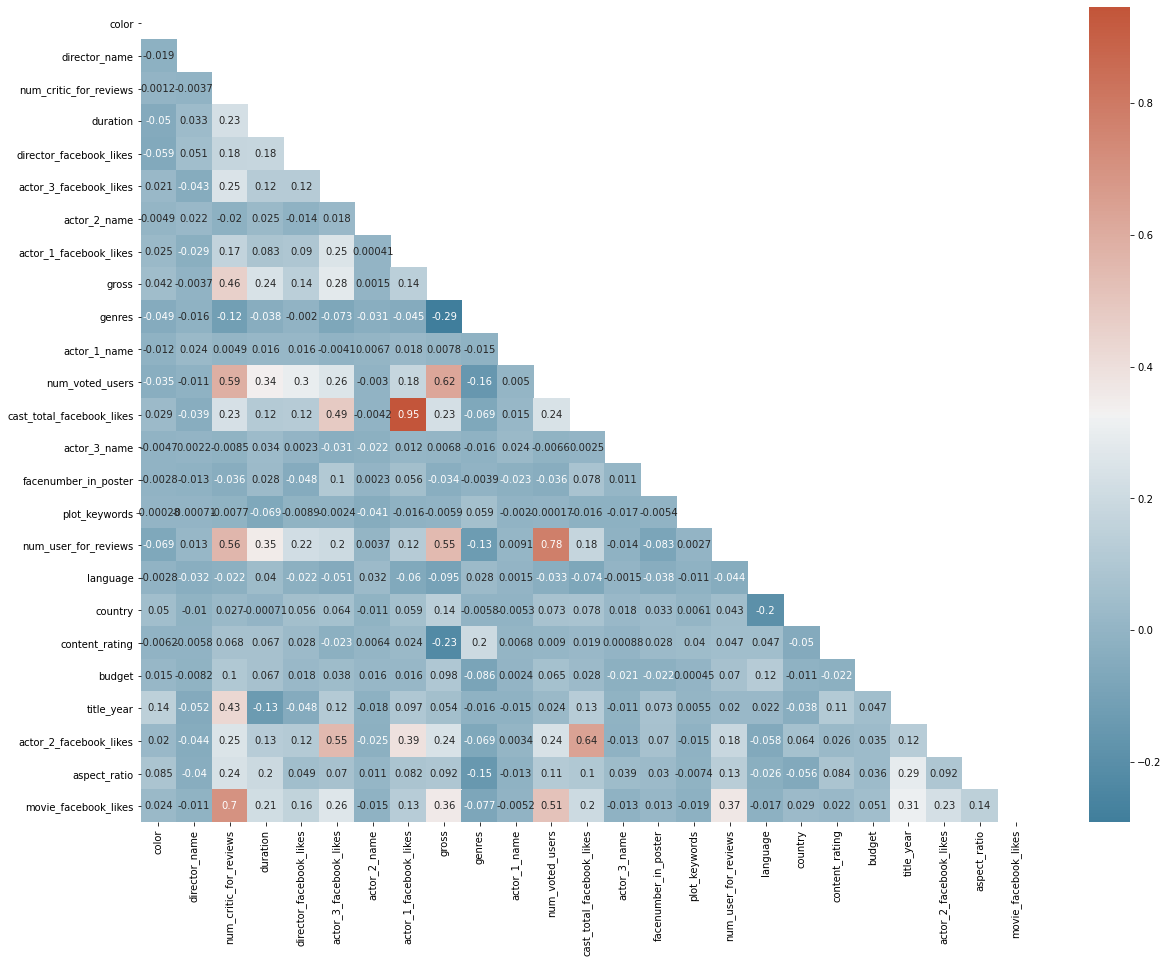

In [34]:
# multicollineariaty detection 

correlation = data.corr()

# plotting a diagonal correlation matrix

mask = np.triu(np.ones_like(correlation, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(20, 15)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(correlation, mask=mask, cmap=cmap, annot=True)# Draw the heatmap with the mask and correct aspect ratio

In [35]:
#removing variables with high colinearity

def drop_colinearity(dataset, value):
    
    col_to_del = set() # Set of all the names of columns to delete
    for i in range(len(correlation.columns)):
        for j in range(i):
            if (correlation.iloc[i, j] >= value) and (correlation.columns[j] not in col_to_del):
                col_name = correlation.columns[i] # getting the name of column
                col_to_del.add(col_name)
                if col_name in dataset.columns:
                    del dataset[col_name] # deleting the column from the dataset

In [36]:
drop_colinearity(data,0.90)

<AxesSubplot:>

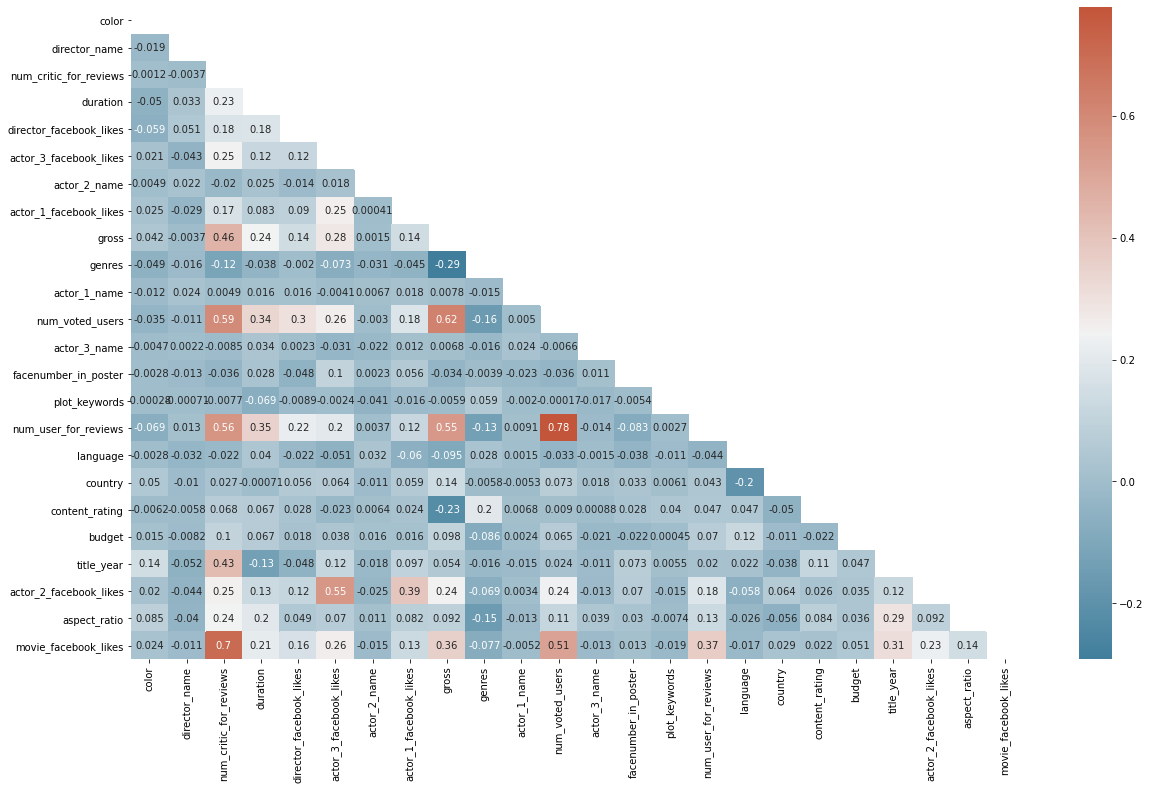

In [41]:
# multicollineariaty detection 

correlation = data.corr()

# plotting a diagonal correlation matrix

mask = np.triu(np.ones_like(correlation, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(20, 12)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(correlation, mask=mask, cmap=cmap, annot=True)# Draw the heatmap with the mask and correct aspect ratio

In [32]:
data.shape

(3723, 25)

In [33]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes', 'imdb_binned'],
      dtype='object')

## CLASSIFICATION MODEL BUILDING

## Data Split  
Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.

In [34]:
# Independent Variables
X = data.drop('imdb_binned', axis=1)

# Dependent/Target Variable
y = data.imdb_binned

In [35]:
y

0       HIT
1       HIT
2       AVG
3       HIT
5       AVG
       ... 
5026    AVG
5027    HIT
5033    AVG
5035    AVG
5042    AVG
Name: imdb_binned, Length: 3723, dtype: category
Categories (3, object): ['FLOP' < 'AVG' < 'HIT']

## Train Test Split

The train-test split is a technique for evaluating the performance of a machine learning algorithm, the dataset is divided into two subsets :
- Train subset: used to fit the machine learning model
- Test subset: used to evaluate the fit machine learning model.

Splitting the dataset into 70:30 (Train:Test) ratio using the test_train_split function in Sklearn library

In [36]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

(2606, 24)
(2606,)


## Scaling

Feature scaling is used to normalize the range of independent features of data.

Standardization: Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training subset, and s is the standard deviation of the training subset.

In [37]:
#Scaling the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [38]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.163262,-1.444015,-0.403067,-0.449107,-0.258145,-0.325508,-1.198977,-0.699479,-0.288501,0.986372,-1.494890,-0.398673,1.528905,-0.170886,0.013105,-0.640626,-0.135429,0.356192,-0.366438,0.055299,0.731983,-0.426810,0.832904,-0.410319
1,0.163262,-0.072528,2.569897,0.268964,-0.169257,0.153623,-1.730070,0.282320,0.111477,-1.203247,-0.561785,0.505825,-0.235276,-0.631947,1.622677,0.718636,-0.135429,0.356192,-0.366438,0.974727,1.172752,0.041221,0.832904,2.078666
2,0.163262,-0.458390,0.476930,-0.090071,-0.208617,-0.220819,0.772982,-0.666224,-0.275224,1.325020,1.116803,-0.084403,-1.324570,-0.631947,0.020788,0.586384,-0.135429,-3.874177,0.784930,-0.174559,0.181023,-0.305749,-0.882825,-0.410319
3,0.163262,1.162649,-0.109734,-0.488999,-0.203697,0.153623,0.915969,4.272959,0.914150,-0.586257,1.126809,-0.266143,1.314467,2.595481,1.706229,-0.515721,-0.135429,0.356192,-0.942122,1.418023,1.172752,0.311448,-0.882825,0.045995
4,0.163262,0.038617,0.278733,-0.129964,-0.265689,-0.082342,1.508342,0.589292,-0.088580,-1.463032,-1.299764,-0.211927,0.104141,0.290175,-0.594805,-0.393265,-0.135429,0.356192,0.784930,-0.059630,0.731983,-0.325746,0.832904,-0.410319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,0.163262,-0.003325,-0.617120,-0.768249,-0.255521,-0.322185,-0.047227,-0.638596,-0.593150,0.160626,1.612124,-0.560787,0.468554,0.290175,0.059203,-0.606339,-0.135429,0.356192,0.784930,-0.092467,1.282944,-0.431945,0.832904,-0.410319
1113,0.163262,1.263308,0.318372,-0.887927,-0.259129,-0.380345,1.553910,-0.726186,1.153542,-0.855320,-0.594306,-0.528447,-1.411397,-0.631947,1.004202,-0.444697,-0.135429,0.356192,-3.820540,0.958309,1.282944,-0.487881,-0.882825,0.958623
1114,0.163262,0.887932,-1.140362,-0.409214,-0.233545,-0.065725,-0.792015,-0.638596,-0.554000,0.415772,-0.434203,-0.687717,-0.239223,-0.170886,0.009264,-0.608788,-0.135429,0.356192,0.784930,-0.470089,-0.590322,-0.269809,0.832904,-0.400280
1115,0.163262,1.634491,4.004847,2.901889,-0.265689,0.707533,0.177466,0.793941,4.066724,-1.565091,-0.444209,1.765389,-1.688983,-0.631947,-0.576559,6.567140,-0.135429,0.356192,-0.366438,3.437481,1.393136,0.581674,0.832904,7.761849


In [39]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.193443,-0.973526,0.305501,0.312211,-0.190678,-0.147863,-1.422253,0.174256,0.710146,0.610816,-1.737734,0.446516,0.133037,-0.190195,0.329519,-0.321722,-0.148871,0.351638,-0.338359,0.116945,0.824118,0.190123,-0.817238,0.493763
1,0.193443,-1.072010,-0.079418,-0.568683,-0.262248,-0.277166,-0.092898,-0.425635,-0.732947,1.153183,0.636420,-0.491220,0.330065,-0.692880,1.443514,-0.297461,-0.148871,-3.536621,0.862136,-0.151467,-0.086332,-0.349613,-1.235568,-0.448709
2,0.193443,-0.924284,-0.562615,-0.336869,-0.236341,-0.104585,-1.198345,-0.409821,-0.509722,0.527375,1.151797,-0.399227,-0.683222,0.815175,-0.699000,-0.452733,-0.148871,0.351638,-0.338359,-0.076908,0.318312,-0.307475,-0.817238,-0.448709
3,0.193443,-1.566484,-0.636323,1.471282,0.011401,0.002024,1.521431,0.288848,-0.138193,-1.095090,-1.317616,-0.074847,-1.097383,-0.190195,0.915635,0.141666,-0.148871,0.351638,0.862136,0.079666,0.014829,-0.222993,0.856085,-0.448709
4,0.193443,-0.786816,0.158085,3.650337,-0.262248,-0.047586,-0.236950,0.403440,1.190861,0.680350,1.510851,4.450997,0.543177,-0.692880,-1.668345,2.526542,-0.148871,0.351638,0.862136,0.042386,-0.389816,-0.275665,-0.817238,1.039405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,0.193443,1.480376,-0.865636,-1.495941,-0.167362,-0.114085,1.571536,-0.412514,0.271593,0.133348,1.227516,0.732917,-0.952628,-0.190195,0.895910,-0.227104,-0.148871,0.351638,-0.338359,-0.136555,-0.895621,-0.306649,-0.817238,-0.448709
2602,0.193443,-1.221789,0.002480,-0.475958,-0.244437,-0.193779,1.098668,0.231552,0.529572,-1.646729,-0.816894,-0.018135,-1.427104,1.317860,0.889335,0.233859,-0.148871,0.351638,-0.338359,0.042386,-0.086332,-0.222993,0.856085,-0.448709
2603,0.193443,1.164405,-1.119519,0.080397,-0.247999,-0.132029,0.179550,-0.398706,-0.755216,1.028022,-0.296632,-0.667061,-0.265040,-0.692880,-1.690888,-0.736589,3.913522,-2.801005,0.862136,-0.088092,0.217151,-0.309747,0.856085,-0.435564
2604,0.193443,-0.782712,-0.398819,0.451300,-0.212052,-0.281916,-1.248450,0.861809,0.405055,-0.469282,0.853806,-0.368340,1.654308,-0.190195,-1.033387,-0.176155,-0.148871,0.351638,-0.938606,-0.032173,0.318312,-0.226298,0.856085,0.096932


## Feature Selection

Feature selection is the process of reducing the number of independent features to reduce the computational cost of modeling and to improve the performance of the model. 

The aim is to develop a trained machine learning model with the minimal required feature and which can predict the data points with acceptable accuracy.

Recursive Feature Elimination Cross-Validated (RFECV) feature selection:
- in selecting the optimal number of features, the estimator is trained and the features are selected via the coefficients, or via the feature importances. The least important features are removed. This process is repeated recursively until the optimal number of features is obtained.

Using feature_importances_ attribute in RandomForestClassifier to calculate the significance of the set of features in the iteration.

In [40]:
#Performing Recursive Feauture Elimation with Cross Validation

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

#Using Random forest for RFE-CV and accuracy as scoring
clf_rf = RandomForestClassifier(random_state=0)

rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='accuracy') # The "accuracy" scoring shows the proportion of correct classifications
rfecv = rfecv.fit(X_train,y_train)

In [41]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 15


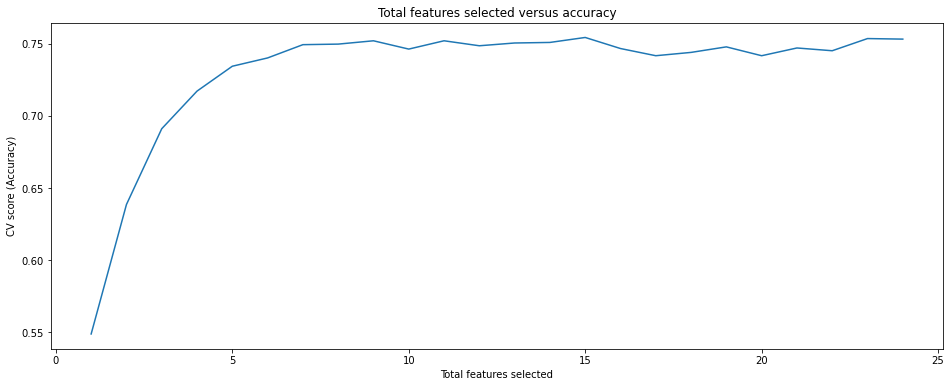

In [43]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('CV score (Accuracy)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [44]:
print('Best features :', X_train.columns[rfecv.support_])

Best features : Int64Index([1, 2, 3, 4, 5, 6, 8, 9, 11, 14, 15, 19, 20, 21, 23], dtype='int64')


In [45]:
#Setting the new selected features
X_train_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test_opt = X_test.iloc[:,X_test.columns[rfecv.support_]]

In [46]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking', 'names' ])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i], 'names': X.columns[i]}
    df_features = df_features.append(row, ignore_index=True)

df_features.sort_values(by='ranking')

,feature,support,ranking,names
11,11,True,1,num_voted_users
21,21,True,1,actor_2_facebook_likes
20,20,True,1,title_year
19,19,True,1,budget
15,15,True,1,num_user_for_reviews
14,14,True,1,plot_keywords
9,9,True,1,genres
8,8,True,1,gross
23,23,True,1,movie_facebook_likes
6,6,True,1,actor_2_name


## Random Forest
- Random forests is an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. 
- n_estimators is a parameter that specify number of trees in the forest. 
- criterion is to specify what function to measure the quality of a split. “entropy” is for the information gain.

In [47]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_opt, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [48]:
#Predicting the target variable
y_pred = classifier.predict(X_test_opt)

## Confusion Matrix

- Confusion matrix computation allows to evaluate the accuracy of a classification. By definition a confusion matrix C is such that Ci,j is equal to the number of observations known to be in group i and predicted to be in group j.

In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred, labels=['FLOP','AVG','HIT'])
cm 

array([[  3,  90,   3],
       [  1, 599,  81],
       [  0, 123, 217]])

## Classification Report

Compute precision, recall, F-measure and support for each class.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

In [58]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred, labels=['FLOP','AVG','HIT'])
print(cr)

              precision    recall  f1-score   support

        FLOP       0.75      0.03      0.06        96
         AVG       0.74      0.88      0.80       681
         HIT       0.72      0.64      0.68       340

    accuracy                           0.73      1117
   macro avg       0.74      0.52      0.51      1117
weighted avg       0.73      0.73      0.70      1117



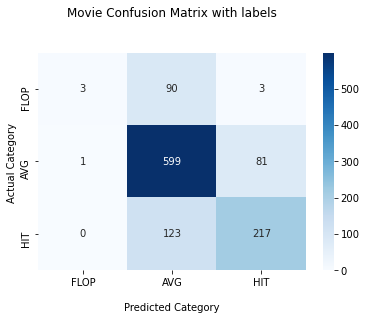

In [59]:
#plt.figure(figsize = (25,20))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt= 'd')

ax.set_title('Movie Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FLOP','AVG', 'HIT'])
ax.yaxis.set_ticklabels(['FLOP','AVG', 'HIT'])

## Display the visualization of the Confusion Matrix.
plt.show()

### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

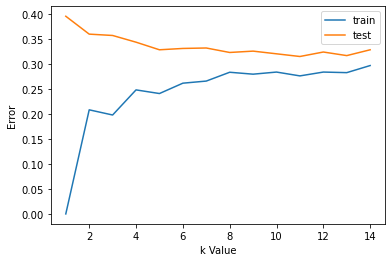

In [49]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
#plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [53]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [54]:
#Predicting the target variable
y_pred = knn.predict(X_test)

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[643,   0,  38],
       [ 94,   1,   1],
       [228,   0, 112]])

In [56]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.67      0.94      0.78       681
        FLOP       1.00      0.01      0.02        96
         HIT       0.74      0.33      0.46       340

    accuracy                           0.68      1117
   macro avg       0.80      0.43      0.42      1117
weighted avg       0.72      0.68      0.62      1117



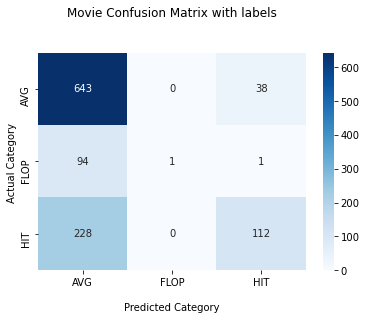

In [57]:
#plt.figure(figsize = (25,20))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt= 'd')

ax.set_title('Movie Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AVG','FLOP', 'HIT'])
ax.yaxis.set_ticklabels(['AVG','FLOP', 'HIT'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Bayes classifier

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [60]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[588,   0,  93],
       [ 89,   0,   7],
       [184,   0, 156]])

In [61]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         AVG       0.68      0.86      0.76       681
        FLOP       0.00      0.00      0.00        96
         HIT       0.61      0.46      0.52       340

    accuracy                           0.67      1117
   macro avg       0.43      0.44      0.43      1117
weighted avg       0.60      0.67      0.62      1117



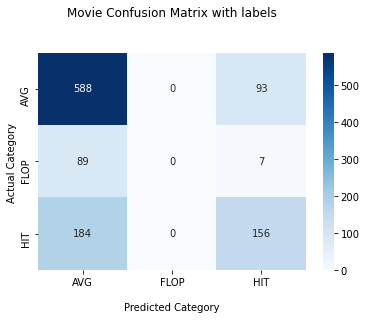

In [62]:
#plt.figure(figsize = (25,20))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt= 'd')

ax.set_title('Movie Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AVG','FLOP', 'HIT'])
ax.yaxis.set_ticklabels(['AVG','FLOP', 'HIT'])

## Display the visualization of the Confusion Matrix.
plt.show()

## SVM (Support vector machine) classifier 

In [64]:
from sklearn.svm import SVC

In [71]:
svm_model_linear = SVC(kernel = 'linear', C = 1)
svm_model_linear.fit(X_train, y_train)
y_pred = svm_model_linear.predict(X_test)

In [72]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[636,   0,  45],
       [ 96,   0,   0],
       [184,   0, 156]])

In [73]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         AVG       0.69      0.93      0.80       681
        FLOP       0.00      0.00      0.00        96
         HIT       0.78      0.46      0.58       340

    accuracy                           0.71      1117
   macro avg       0.49      0.46      0.46      1117
weighted avg       0.66      0.71      0.66      1117



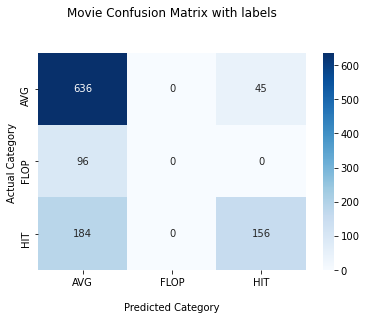

In [74]:
#plt.figure(figsize = (25,20))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt= 'd')

ax.set_title('Movie Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AVG','FLOP', 'HIT'])
ax.yaxis.set_ticklabels(['AVG','FLOP', 'HIT'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Decision tree classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
#Performing Recursive Feauture Elimation with Cross Validation

from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

#Using Random forest for RFE-CV and accuracy as scoring
clf =  DecisionTreeClassifier(max_depth = 2)

rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy') # The "accuracy" scoring shows the proportion of correct classifications
rfecv = rfecv.fit(X_train,y_train)

print("Optimum number of features: %d" % rfecv.n_features_)

print('Best features :', X_train.columns[rfecv.support_])

#Setting the new selected features
X_train_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test_opt = X_test.iloc[:,X_test.columns[rfecv.support_]]
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking', 'names' ])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i], 'names': X.columns[i]}
    df_features = df_features.append(row, ignore_index=True)

df_features.sort_values(by='ranking')

Optimum number of features: 1
Best features : Int64Index([11], dtype='int64')


,feature,support,ranking,names
11,11,True,1,num_voted_users
19,19,False,2,budget
23,23,False,3,movie_facebook_likes
22,22,False,4,aspect_ratio
21,21,False,5,actor_2_facebook_likes
20,20,False,6,title_year
18,18,False,7,content_rating
17,17,False,8,country
16,16,False,9,language
15,15,False,10,num_user_for_reviews


In [75]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

In [76]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[620,   0,  61],
       [ 92,   0,   4],
       [199,   0, 141]])

In [77]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         AVG       0.68      0.91      0.78       681
        FLOP       0.00      0.00      0.00        96
         HIT       0.68      0.41      0.52       340

    accuracy                           0.68      1117
   macro avg       0.46      0.44      0.43      1117
weighted avg       0.62      0.68      0.63      1117



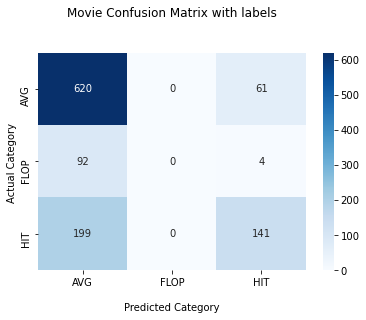

In [78]:
#plt.figure(figsize = (25,20))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt= 'd')

ax.set_title('Movie Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AVG','FLOP', 'HIT'])
ax.yaxis.set_ticklabels(['AVG','FLOP', 'HIT'])

## Display the visualization of the Confusion Matrix.
plt.show()

## logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [69]:
#Performing Recursive Feauture Elimation with Cross Validation

from sklearn.feature_selection import RFECV

#Using Random forest for RFE-CV and accuracy as scoring
classifier =  LogisticRegression(random_state=0)

rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy') # The "accuracy" scoring shows the proportion of correct classifications
rfecv = rfecv.fit(X_train,y_train)

print("Optimum number of features: %d" % rfecv.n_features_)

print('Best features :', X_train.columns[rfecv.support_])

#Setting the new selected features
X_train_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test_opt = X_test.iloc[:,X_test.columns[rfecv.support_]]
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking', 'names' ])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i], 'names': X.columns[i]}
    df_features = df_features.append(row, ignore_index=True)

df_features.sort_values(by='ranking')

Optimum number of features: 11
Best features : Int64Index([0, 2, 3, 4, 8, 9, 11, 15, 16, 20, 23], dtype='int64')


,feature,support,ranking,names
0,0,True,1,color
20,20,True,1,title_year
16,16,True,1,language
15,15,True,1,num_user_for_reviews
9,9,True,1,genres
8,8,True,1,gross
11,11,True,1,num_voted_users
3,3,True,1,duration
2,2,True,1,num_critic_for_reviews
23,23,True,1,movie_facebook_likes


In [72]:
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train_opt, y_train)
y_pred = classifier.predict(X_test_opt)

In [73]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[625,   3,  53],
       [ 93,   2,   1],
       [172,   2, 166]])

In [74]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.70      0.92      0.80       681
        FLOP       0.29      0.02      0.04        96
         HIT       0.75      0.49      0.59       340

    accuracy                           0.71      1117
   macro avg       0.58      0.48      0.48      1117
weighted avg       0.68      0.71      0.67      1117



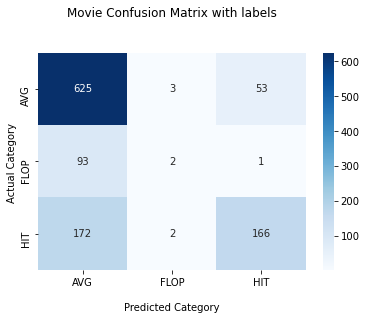

In [75]:
#plt.figure(figsize = (25,20))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt= 'd')

ax.set_title('Movie Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AVG','FLOP', 'HIT'])
ax.yaxis.set_ticklabels(['AVG','FLOP', 'HIT'])

## Display the visualization of the Confusion Matrix.
plt.show()

## TO DO 
- overfitting and underfitting detection
- aggiungere descrizione colonne 
- altri ML